In [72]:
from Tkinter import *
import math
import matplotlib.patches as patches
import pandas as pd

images_paths = ["180124_N21_Pan.gif",
                '180124_E14_X31_Allantois_100_600_635_635_2_635.gif',
                '180124_N22_Cal_100_600_635_635_635.gif',
                '180124_N23_X31_100_600_635_635_635_635.gif',
                '180124_E15_X31_100_600_635_635.gif',
               ]

directory = ["180124_N21_Pan","180124_E14_X31","180124_N22_Cal","180124_N23_X31","180124_E15_X31"]
which_image = 4
fpath = directory[which_image]+'/'+images_paths[which_image]



In [73]:
event2canvas = lambda e, c: (c.canvasx(e.x), c.canvasy(e.y))

root = Toplevel()

#setting up a tkinter canvas with scrollbars
frame = Frame(root, bd=2, relief=SUNKEN)
frame.grid_rowconfigure(0, weight=1)
frame.grid_columnconfigure(0, weight=1)
xscroll = Scrollbar(frame, orient=HORIZONTAL)
xscroll.grid(row=1, column=0, sticky=E+W)
yscroll = Scrollbar(frame)
yscroll.grid(row=0, column=1, sticky=N+S)
canvas = Canvas(frame, bd=0, xscrollcommand=xscroll.set, yscrollcommand=yscroll.set)
canvas.grid(row=0, column=0, sticky=N+S+E+W)
xscroll.config(command=canvas.xview)
yscroll.config(command=canvas.yview)
frame.pack(fill=BOTH,expand=1)

img = PhotoImage(file=fpath)
canvas.create_image(0,0,image=img,anchor="nw")
canvas.config(scrollregion=canvas.bbox(ALL))

#function to be called when mouse is clicked
def printcoords(event):
    #outputting x and y coords to console
    cx, cy = event2canvas(event, canvas)
    print ("(%d, %d)" % (cx,cy))
#mouseclick event
canvas.bind("<ButtonPress-1>",printcoords)

root.mainloop()

(292, 250)
(329, 1760)
(1939, 1747)
(1932, 267)
(297, 2810)
(326, 4315)
(1939, 4309)
(1917, 2795)
(297, 5188)
(317, 6692)
(1911, 6707)
(1925, 5193)


In [76]:
class Point:
    
    def __init__(self,x,y):
        self.x = x
        self.y = y
        
    def __sub__(self,other):
        return Point(self.x-other.x, self.y-other.y)
    
    def __add__(self,other):
        return Point(self.x+other.x, self.y+other.y)
    
    def __neg__(self):
        return Point(self.x-other.x, self.y-other.y)
    
    def __repr__(self):
        return "Point({},{})".format(self.x, self.y)
    
    def __abs__(self):
        return Point(abs(self.x),abs(self.y))
    
    @property
    def as_tuple(self):
        return (self.x,self.y)
    
    @property
    def abs_distance(self):
        return math.sqrt(abs(self.x)**2+abs(self.y)**2)
        
class Rectangle:
    
    def __init__(self,corner1, corner2, corner3, corner4):
        self.corner1 = corner1
        self.corner2 = corner2
        self.corner3 = corner3
        self.corner4 = corner4
        
    @property    
    def size(self):
        return self.corner3 - self.corner1 
    
    
    @property    
    def vertical(self):
        return self.corner2 - self.corner1
        
    @property    
    def horizontal(self):
        return self.corner4 - self.corner1
        
    @property    
    def corners(self):
        return [self.corner1.as_tuple,
                self.corner2.as_tuple,
                self.corner3.as_tuple,
                self.corner4.as_tuple,
               ]
    @property
    def rotational_angle(self):
        return math.tan(self.vertical.x/self.vertical.y)
                
    
class Grid:
    
    def __init__(self, rectangle, shape):
        self.rectangle = rectangle
        self.shape = shape

    @property
    def horizontal_points(self, with_off_set=False):
        x = np.linspace(0,self.rectangle.horizontal.x,self.shape.x)
        y = np.linspace(0,self.rectangle.horizontal.y,self.shape.x)
        return zip(x,y)
    
    @property
    def vertical_points(self,  with_off_set=False):
        x = np.linspace(0,self.rectangle.vertical.x,self.shape.y)
        y = np.linspace(0,self.rectangle.vertical.y,self.shape.y)
        return zip(x,y)
    
    
    
    @property
    def abs_vertical_spacing(self):
        return Point(self.vertical_points[1][0], self.vertical_points[1][1]).abs_distance

    
    @property
    def abs_horizontal_spacing(self):
        return Point(self.horizontal_points[1][0], self.horizontal_points[1][1]).abs_distance
        
    @property
    def points(self):
        
            
        horizontal_points = [(x+self.rectangle.corner1.x, y + self.rectangle.corner1.y) for x,y in self.horizontal_points]
        xy = []
        for vertical_points_x,vertical_points_y in self.vertical_points:
            xy += [(x + vertical_points_x,y + vertical_points_y)for x,y in horizontal_points]
           
        return xy
    
    def add_row(self, where="top"):
        
        shift = Point(self.vertical_points[1][0], self.vertical_points[1][1])
        self.shape.y += 1
        
        if where == "top":
            self.rectangle.corner1 = self.rectangle.corner1 - shift
            self.rectangle.corner4 = self.rectangle.corner4 - shift
            
        if where =="bottom":
            self.rectangle.corner2 = self.rectangle.corner2 + shift
            self.rectangle.corner3 = self.rectangle.corner3 + shift
            
        
        
    
    
def plot_patches(x,y,x_spacing,y_spacing):
    fig2 = plt.figure(figsize=(30,10))
    ax2 = fig2.add_subplot(111, aspect='equal')
    pts = np.vstack([x, y]).reshape(2, -1).T
    for p in [
        patches.Rectangle(
            (patchcenter[1]-0.5*x_spacing, patchcenter[0]-0.5*y_spacing),
            x_spacing,
            y_spacing,
            fill=False,      # remove background
            linewidth=1,
            edgecolor='r'
        ) for patchcenter in pts
    ]:
        ax2.add_patch(p)
        
    return fig2   



In [77]:
def create_patches(pt,x_spacing,y_spacing):
    rec  = patches.Rectangle(
            (pt[0]-0.5*x_spacing, pt[1]-0.5*y_spacing),
            x_spacing,
            y_spacing,
            fill=False,      # remove background
            linewidth=1,
            edgecolor='r'
            ) 
    
    return rec
    
def rectangle_reshape(x_0,y_0,x_spacing,y_spacing):
    x_min = int(x_0-0.5*x_spacing)
    x_max = int(x_0+0.5*x_spacing)
    y_min = int(y_0-0.5*y_spacing)
    y_max = int(y_0+0.5*y_spacing)
    return x_min,x_max, y_min ,y_max        
       

In [78]:
rec_E14_1 = [(296, 244),
           (314, 1746),
           (1903, 1766),
           (1912, 207),
            ]

rec_E14_2 = [(303, 2791),
             (298, 4303),
             (1922, 4293),
             (1908, 2786),
            ]

rec_E14_3 = [(302, 5164),
             (297, 6680),
             (1923, 6701),
             (1910, 5158),
            ]
#############################
rec_N21_1 = [(296, 244),
           (314, 1746),
           (1903, 1766),
           (1912, 207),
            ]

rec_N21_2 = [(303, 2791),
             (298, 4303),
             (1922, 4293),
             (1908, 2786),
            ]

rec_N21_3 = [(302, 5164),
             (297, 6680),
             (1923, 6701),
             (1910, 5158),
            ]
##############################
rec_N22_1 = [(310, 314),
            (323, 1846),
            (1928, 1831),
            (1931, 304),
           ]

rec_N22_2 = [(321, 2873),
            (337, 4399),
            (1951, 4382),
            (1926, 2869),
           ]
rec_N22_3 = [(311, 5254),
            (349, 6768),
            (1944, 6766),
            (1959, 5239),
                       ]
#################################
rec_N23_1 = [(336, 321),
            (354, 1831),
            (1959, 1853),
            (1968, 312),
            ]

rec_N23_2 = [(328, 2858),
            (332, 4385),
            (1946, 4403),
            (1960, 2873),
            ]

rec_N23_3 = [(321, 5251),
            (310, 6763),
            (1929, 6789),
            (1941, 5255),
            ]

#######################
rec_E15_1 = [(292, 250),
            (329, 1760),
            (1939, 1747),
            (1932, 267),
            ]

rec_E15_2 = [(297, 2810),
            (326, 4315),
            (1939, 4309),
            (1917, 2795),
            ]

rec_E15_3 = [(297, 5188),
            (317, 6692),
            (1911, 6707),
            (1925, 5193),
            ]

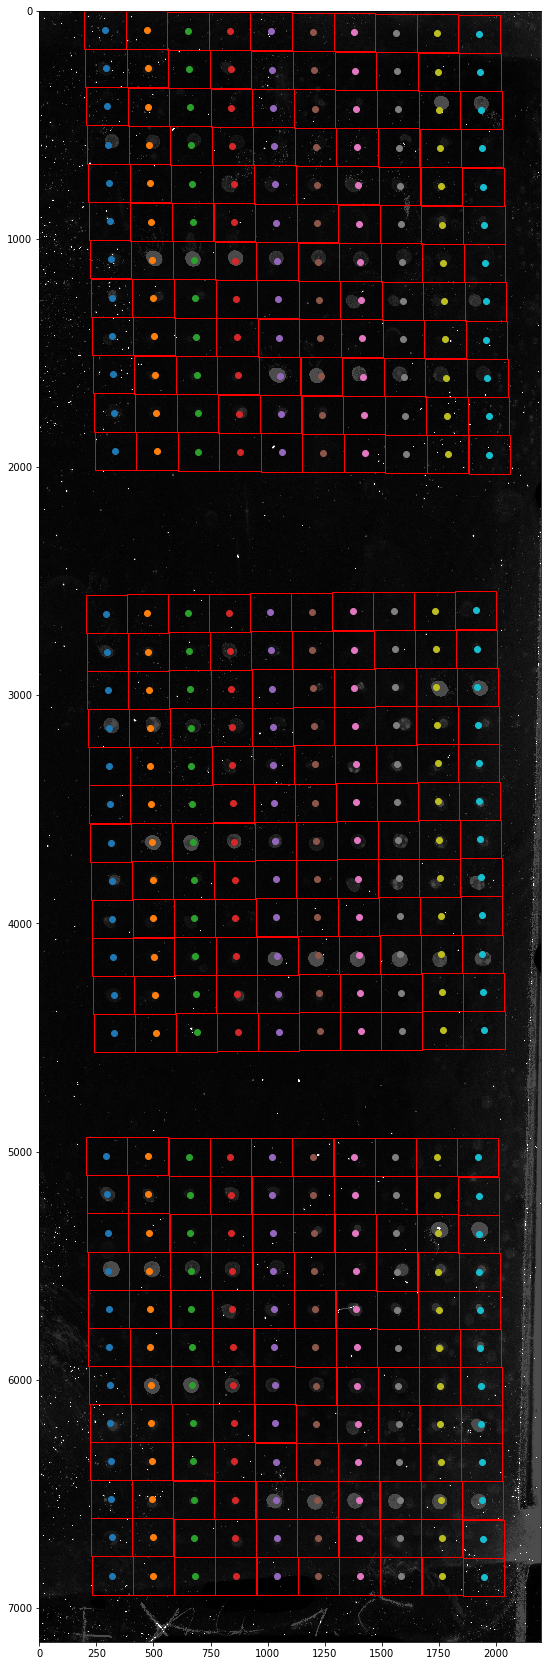

In [79]:
import matplotlib.pyplot as plt
import cv2
import copy
import numpy as np
rec1,rec2,rec3 = (rec_E15_1,rec_E15_2,rec_E15_3)


rect1 = Rectangle(*tuple(Point(x,y) for x,y in rec1))
rect2 = Rectangle(*tuple(Point(x,y) for x,y in rec2))
rect3 = Rectangle(*tuple(Point(x,y) for x,y in rec3))

shape = Point(10,10)

grid1 = Grid(rectangle = rect1, shape = shape)
grid2 = Grid(rectangle = rect2, shape = copy.deepcopy(shape))
grid3 = Grid(rectangle = rect3, shape = copy.deepcopy(shape))
f_new = fpath.replace('.gif','.jpg')
imag = cv2.imread(f_new,0)

fig,ax = plt.subplots(1, figsize=(30,30))
intensities = []
spot_images = []
xy = []
grid4 = copy.deepcopy(grid3)
grid4.add_row(where="top")
grid4.add_row(where="bottom")

for grid in [grid1,grid2,grid3]:
    grid.add_row(where="top")
    grid.add_row(where="bottom")
    for x,y in grid.points:
        delta_x = int(grid.abs_horizontal_spacing)
        delta_y = int(grid.abs_vertical_spacing)
        x = int(x)
        y = int(y)
        xy.append((x,y))
        rec = create_patches((x,y),delta_x,delta_y)
        ax.add_patch(rec)
        x0,y0 = rec.xy
        
        x0 = int(x0)
        y0 = int(y0)
        if x0 < 0:
            x0 = 0
        if y0 < 0:
            y0 = 0
        
        
        spot_imag= imag[y0:y0+delta_x ,x0:x0+delta_x]
        spot_images.append(spot_imag)
        intensities.append(spot_imag.sum())
        ax.scatter(x,y)
    
ax.imshow(imag,cmap='gray')
plt.show()



In [80]:
#show spot
# spot_number = 10
# plt.figure()
# plt.imshow(spot_images[spot_number])
# print(xy[spot_number])
# plt.show()
# plt.figure()
# plt.scatter(xy[spot_number][0],xy[spot_number][1])
# plt.imshow(imag[:2000,])
# plt.show()


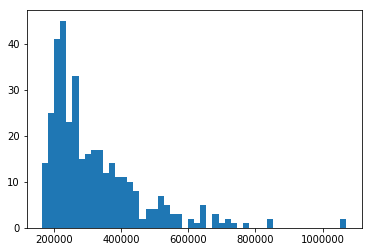

In [81]:
plt.hist(intensities,50)
plt.show()

In [82]:
output = pd.read_csv("base_pep.gal", sep='\t', index_col="ID")
output["Intensity"] = intensities
output=output.pivot(index="Row", columns="Column", values="Intensity")
output.to_csv("{}/{}_intensity.tsv".format(directory[which_image],directory[which_image]), sep='\t')